In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [ ]:
# Ребро соединяет вершины x и y при (x < y), если x-ая цифра двоичного представления числа y не равна нулю.
def draw_graph(graph, pos, labels=None, node_size=300):
    plt.figure(figsize = (12, 12))
    nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes(),node_size=node_size)
    if labels:
        if labels == True:
            nx.draw_networkx_labels(graph, pos)
        else:
            nx.draw_networkx_labels(graph, pos, labels=labels)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=graph.edges())
    plt.axis('on')
    plt.show()

# граф 1

## Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

In [ ]:
# граф Радо содержит все конечные и счётные бесконечные графы в качестве подграфов. Граф Радо известен также под именами случайный граф и граф Эрдёша — Реньи

In [ ]:
def rado_graph(n):
    G = nx.Graph()
    for node_n in range(n):
        G.add_node(node_n)
        G.nodes[node_n]['degree'] = 0
        for conn_node_pos, digit in enumerate(bin(node_n)[-1:1:-1]):
            if digit == '1':
                G.add_edge(node_n, conn_node_pos)
                G.nodes[node_n]['degree'] += 1
                G.nodes[conn_node_pos]['degree'] += 1
    return G

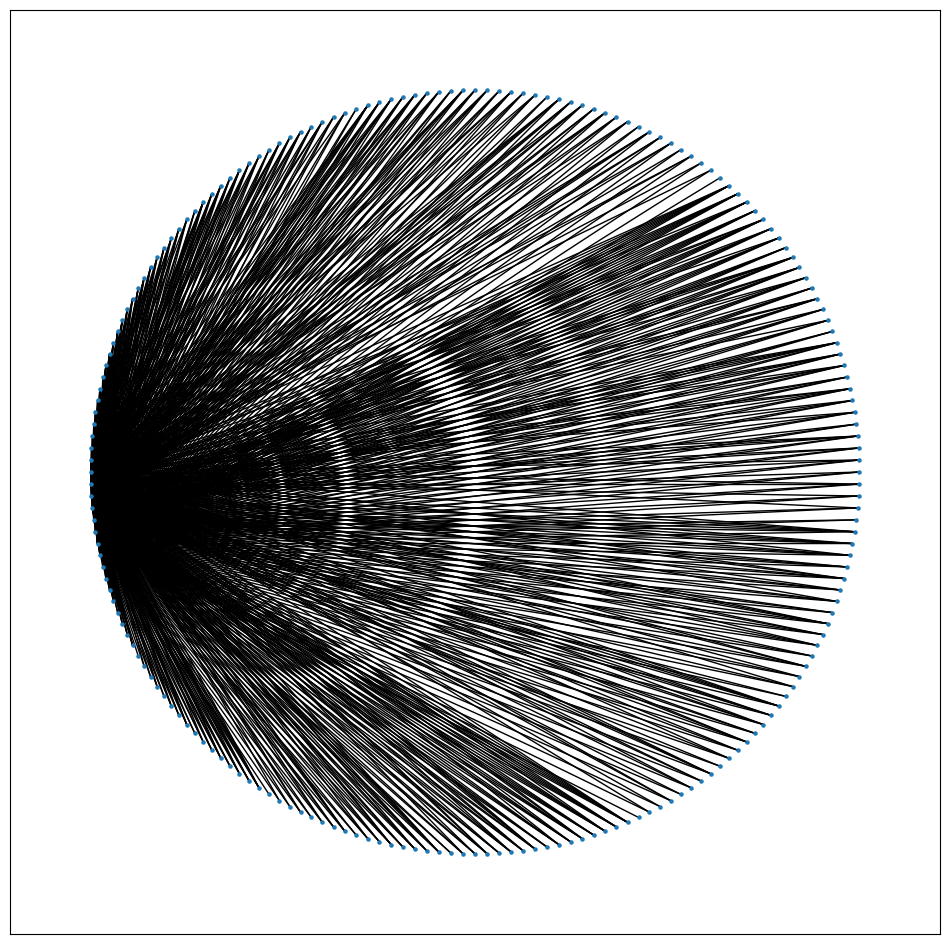

In [ ]:
G = rado_graph(200)
draw_graph(G, pos=nx.shell_layout(G), labels=False, node_size=5)

## Рассчитать среднюю степень вершины фрактального графа

In [ ]:
print(f'avg degree for graph = {reduce(lambda x,y: x+y, nx.get_node_attributes(G, "degree").values())/len(G.nodes())}')

avg degree for graph = 7.32


## Построить распределение степеней вершин фрактального графа

In [ ]:
def count_degrees(G):
    arr = {}
    for degree in nx.get_node_attributes(G, 'degree').values():
        if arr.get(degree):
            arr[degree] +=1
        else:
            arr[degree] = 1
    arr = list(arr.items())
    return sorted(arr, key=lambda x: x[0])

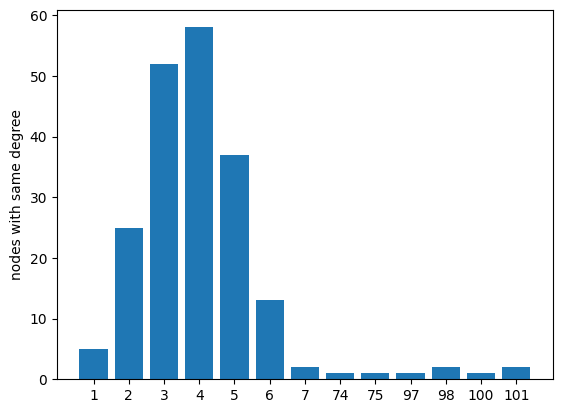

In [ ]:
degrees = count_degrees(G)

degree = [x[0] for x in degrees]
count = [x[1] for x in degrees]
x_pos = np.arange(len(degree))

plt.bar(x_pos, count,align='center')
plt.xticks(x_pos, degree)
plt.ylabel('nodes with same degree')
plt.show()

# граф 2

## Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

In [ ]:
# Ребро соединяет вершины x и y при (x < y), если x-ая цифра двоичного представления числа y равна нулю.
def rado_graph(n):
    G = nx.Graph()
    for node_n in range(n):
        G.add_node(node_n)
        G.nodes[node_n]['degree'] = 0
        for conn_node_pos, digit in enumerate(bin(node_n)[-1:1:-1]):
            if digit == '0':
                G.add_edge(node_n, conn_node_pos)
                G.nodes[node_n]['degree'] += 1
                G.nodes[conn_node_pos]['degree'] += 1
    return G

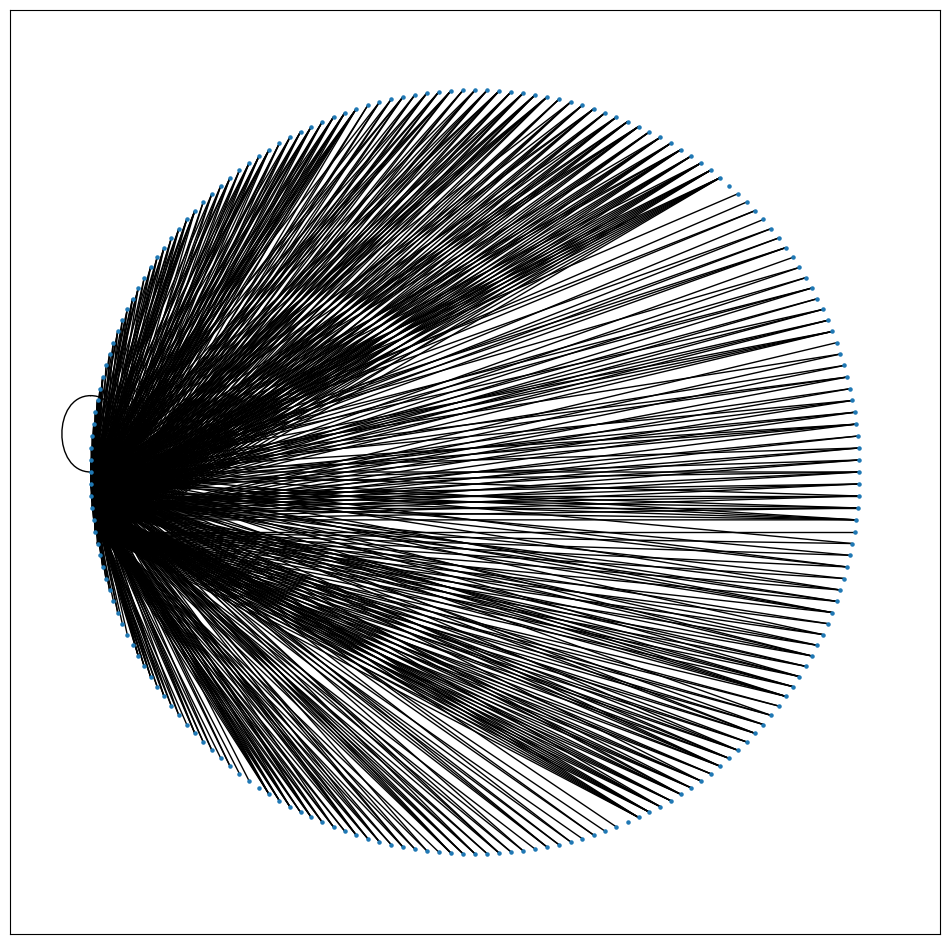

In [ ]:
G = rado_graph(200)
draw_graph(G, pos=nx.shell_layout(G), labels=False, node_size=5)

## Рассчитать среднюю степень вершины фрактального графа

In [ ]:
print(f'avg degree for graph = {reduce(lambda x,y: x+y, nx.get_node_attributes(G, "degree").values())/len(G.nodes())}')

avg degree for graph = 6.14


## Построить распределение степеней вершин фрактального графа

In [ ]:
def count_degrees(G):
    arr = {}
    for degree in nx.get_node_attributes(G, 'degree').values():
        if arr.get(degree):
            arr[degree] +=1
        else:
            arr[degree] = 1
    arr = list(arr.items())
    return sorted(arr, key=lambda x: x[0])

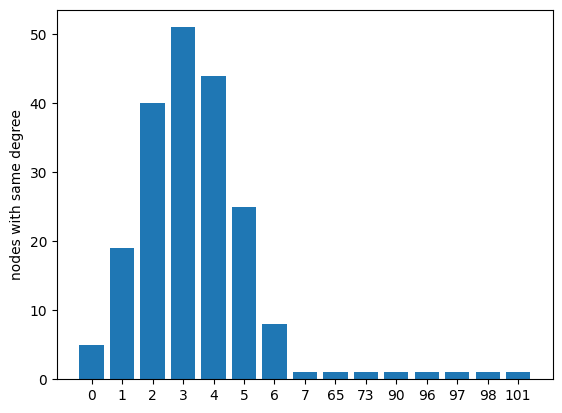

In [ ]:
degrees = count_degrees(G)

degree = [x[0] for x in degrees]
count = [x[1] for x in degrees]
x_pos = np.arange(len(degree))

plt.bar(x_pos, count,align='center')
plt.xticks(x_pos, degree)
plt.ylabel('nodes with same degree')
plt.show()

# граф 3

## Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

In [ ]:
def tr(x1, y1, x2, y2, x3, y3, G, optional=None):
    G.add_nodes_from([((x1, y1), {'pos': (x1, y1), 'degree': 2}), ((x2, y2), {'pos': (x2, y2), 'degree': 2}), ((x3, y3), {'pos': (x3, y3), 'degree': 2})])
    G.add_edges_from([((x1, y1), (x2, y2)), ((x1, y1), (x3, y3)), ((x2, y2), (x3, y3))])
    if optional:
        G.add_edges_from([((x1, y1), (optional[0], optional[1])), ((x1, y1), (optional[2], optional[3])),
                          ((x2, y2), (optional[2], optional[3])), ((x2, y2), (optional[4], optional[5])),
                          ((x3, y3), (optional[0], optional[1])), ((x3, y3), (optional[4], optional[5]))])
        G.remove_edges_from([((optional[0], optional[1]), (optional[2], optional[3])),
                             ((optional[2], optional[3]), (optional[4], optional[5])),
                             ((optional[0], optional[1]), (optional[4], optional[5]))])
        G.nodes[(x1, y1)]['degree'] += 2
        G.nodes[(x2, y2)]['degree'] += 2
        G.nodes[(x3, y3)]['degree'] += 2


In [ ]:
# Ребро соединяет вершины x и y при (x < y), если x-ая цифра двоичного представления числа y равна нулю.
def draw(x1, y1, x2, y2, x3, y3, n, G): #n for stage
    if n > 0:
        x1n = round((x1+x2)/2, 5)
        y1n = round((y1+y2)/2, 5)
        x2n = round((x2+x3)/2, 5)
        y2n = round((y2+y3)/2, 5)
        x3n = round((x3+x1)/2, 5)
        y3n = round((y3+y1)/2, 5)

        tr(x1n, y1n, x2n, y2n, x3n, y3n, G, optional = [x1, y1, x2, y2, x3, y3])

        draw(x1, y1, x1n, y1n, x3n, y3n, n-1, G)
        draw(x2, y2, x1n, y1n, x2n, y2n, n-1, G)
        draw(x3, y3, x2n, y2n, x3n, y3n, n-1, G)

In [ ]:
def iterative_triangle(n):
    G = nx.Graph()
    tr(0, 0, 1, 0, 0.5, 1, G)
    draw(0, 0, 1, 0, 0.5, 1, n, G)
    return G

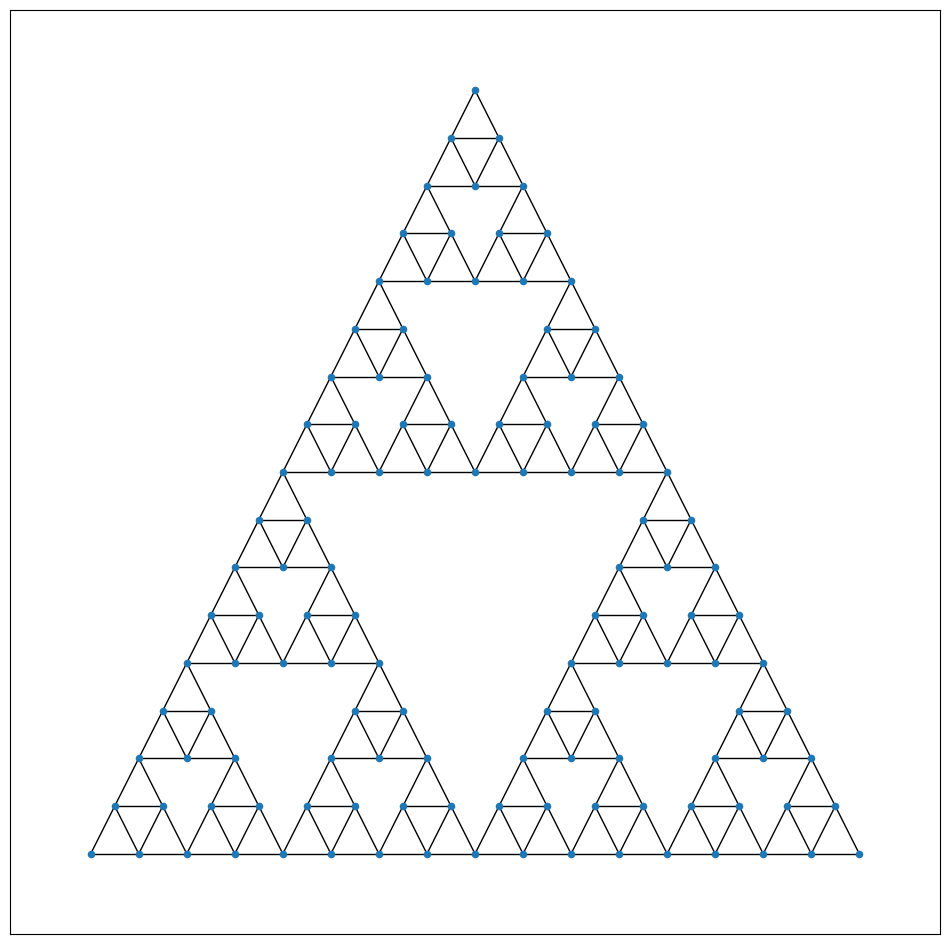

In [ ]:
G = iterative_triangle(4)
draw_graph(G, pos=nx.get_node_attributes(G, 'pos'), labels=False, node_size=20)

## Рассчитать среднюю степень вершины фрактального графа

In [ ]:
print(f'avg degree for graph = {reduce(lambda x,y: x+y, nx.get_node_attributes(G, "degree").values())/len(G.nodes())}')

avg degree for graph = 3.951219512195122


## Построить распределение степеней вершин фрактального графа

In [ ]:
def count_degrees(G):
    arr = {}
    for degree in nx.get_node_attributes(G, 'degree').values():
        if arr.get(degree):
            arr[degree] +=1
        else:
            arr[degree] = 1
    arr = list(arr.items())
    return sorted(arr, key=lambda x: x[0])

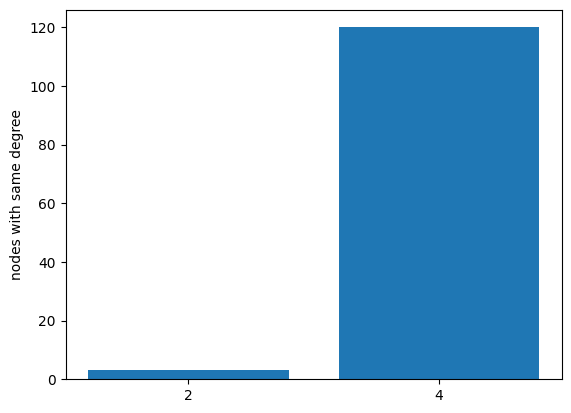

In [ ]:
degrees = count_degrees(G)

degree = [x[0] for x in degrees]
count = [x[1] for x in degrees]
x_pos = np.arange(len(degree))

plt.bar(x_pos, count,align='center')
plt.xticks(x_pos, degree)
plt.ylabel('nodes with same degree')
plt.show()